In [2]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [3]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [4]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [8]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [12]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data (excluding the non-numeric columns)
scaled_data = scaler.fit_transform(df_market_data)

# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns, index=df_market_data.index)

# Display the first five rows of the scaled DataFrame
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Scaled DataFrame.

In [206]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Display the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [14]:
# Create an empty list to store the inertia values
inertia_values = []

# Define the range of k values
k_values = range(1, 12)

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the scaled data
    kmeans.fit(df_scaled)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

     k     inertia
0    1  287.000000
1    2  212.123342
2    3  170.193571
3    4   79.022435
4    5   71.097914
5    6   66.108827
6    7   54.488123
7    8   43.224693
8    9   32.860884
9   10   28.404885
10  11   24.116198


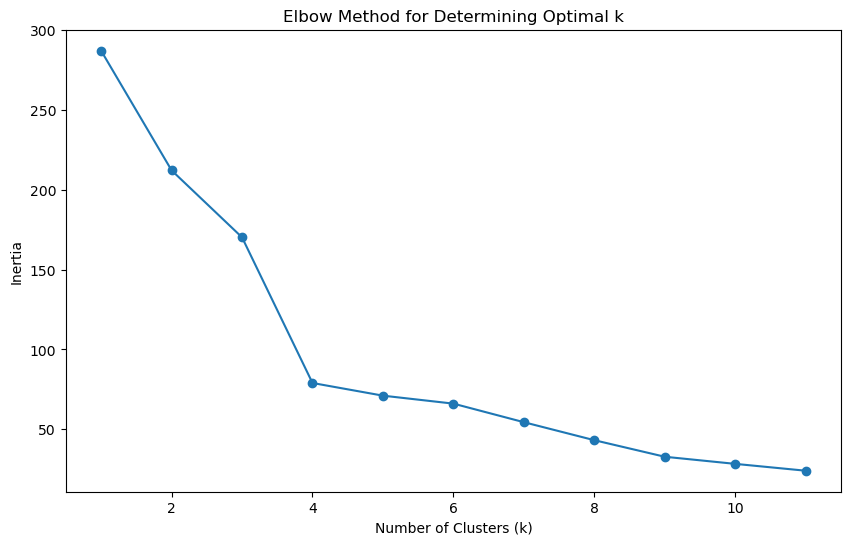

In [16]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal k')
plt.show()



#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** k = 4
This suggests that 4 is the optimal number of clusters for your data. This is where adding more clusters beyond 4 results in diminishing returns in terms of inertia reduction.

---

### Cluster Cryptocurrencies with K-means Using the Original Scaled DataFrame

In [21]:
# Initialize the K-Means model using the best value for k
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42)

In [23]:
# Fit the K-Means model using the scaled DataFrame
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=42)

In [25]:
# Predict the clusters to group the cryptocurrencies using the scaled DataFrame
# Fit the model to the scaled data and predict the clusters
cluster_labels = kmeans.fit_predict(df_scaled)

# Print the resulting array of cluster values
print(cluster_labels)

[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [27]:
# Create a copy of the scaled DataFrame
df_scaled_copy = df_scaled.copy()

# Add a new column to the copy of the scaled DataFrame with the predicted clusters
df_market_data['Cluster'] = cluster_labels

# Print the resulting array of cluster values.
df_market_data.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761,0
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023,0
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954,2
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193,2
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384,0


In [31]:
# Create a scatter plot using hvPlot
scatter_plot = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='Cluster',  # Color points by the 'Cluster' labels
    hover_cols=['crypto_name'],  # Add the cryptocurrency name to hover columns
    title='Cryptocurrency Clusters',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=800,
    height=600
)

# Display the plot
scatter_plot

:NdOverlay   [Cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

### Optimize Clusters with Principal Component Analysis.

In [58]:
# Create a PCA model instance and set n_components=3
pca = PCA(n_components=3)

# Fit the PCA model to the scaled data
pca_fit = pca.fit(df_scaled)

In [60]:
# Copy the crypto names from the original DataFrame
crypto_names = df_market_data.index

# Ensure the PCA DataFrame is created correctly
df_pca = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'])

# Add the crypto names to the new PCA DataFrame
df_pca["crypto_name"] = crypto_names


In [62]:
# Set the crypto_name column as index
df_pca.set_index('crypto_name', inplace=True)

# Display the updated DataFrame
df_pca.head()

,PC1,PC2,PC3
crypto_name,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [39]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
# Retrieve the explained variance
explained_variance = pca.explained_variance_ratio_

# Display the explained variance
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.3719856+0.34700813+0.17603793 = 0.89503166

This means that the three principal components together account for approximately 89.50% of the total variance in the dataset. This is a substantial amount, indicating that these three components capture most of the information in the original data.

---

### Find the Best Value for k Using the Scaled PCA DataFrame

In [242]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

# Print the list of k-values
print(k_values)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [66]:
# Create an empty list to store the inertia values


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
for k in range(1, 12):
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the PCA-transformed data
    kmeans.fit(df_pca)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans.inertia_)

# Print the inertia values
print(inertia_values)



[256.8740855678924, 182.33953007775642, 140.43183298408366, 49.66549665179734, 42.05190109791724, 31.74900524438901, 28.031869172552746, 19.451747206041347, 13.8140819715581, 10.630647573870968, 10.12024262995776]


In [68]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': range(1, 12),        # List of k-values from 1 to 11
    'inertia': [256.8740855678924, 182.33953007775642, 140.43183298408366, 49.66549665179734, 42.05190109791724, 31.74900524438901, 28.031869172552746, 19.451747206041347, 13.8140819715581, 10.630647573870968, 10.12024262995776]  # Corresponding inertia values
}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)


     k     inertia
0    1  256.874086
1    2  182.339530
2    3  140.431833
3    4   49.665497
4    5   42.051901
5    6   31.749005
6    7   28.031869
7    8   19.451747
8    9   13.814082
9   10   10.630648
10  11   10.120243


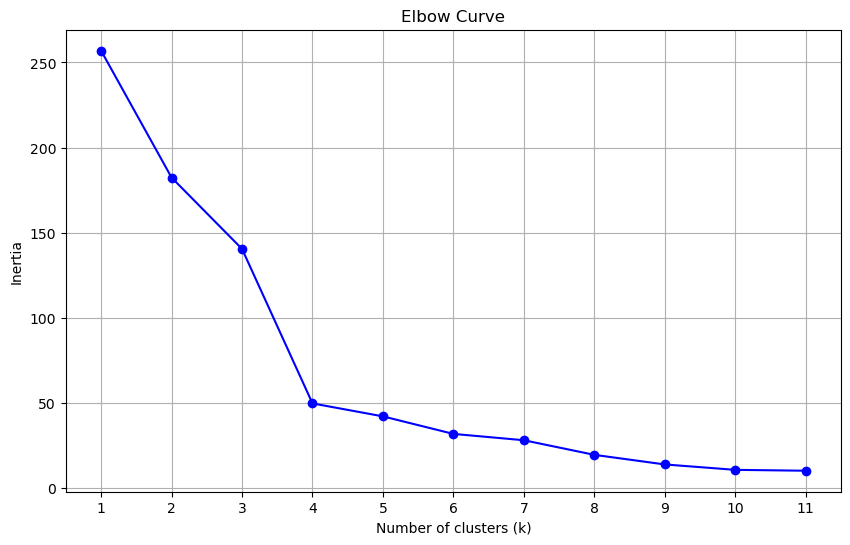

In [250]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.show()


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** From the Elbow curve, the best value for 𝑘 appears to be 4. This is where the decrease in inertia starts to slow down significantly, indicating that adding more clusters beyond this point does not provide substantial improvements in terms of within-cluster variability.


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No it is the same

### Cluster Cryptocurrencies with K-means Using the Scaled PCA DataFrame

In [72]:
# Initialize the K-Means model using the best value for k
best_k = 4
kmeans_best = KMeans(n_clusters=best_k, random_state=42)

In [74]:
# Fit the K-Means model using the PCA data
kmeans_best.fit(df_pca)

KMeans(n_clusters=4, random_state=42)

In [76]:
# Predict the clusters to group the cryptocurrencies using the scaled PCA DataFrame
cluster_labels_best = kmeans_best.predict(df_pca)

# Print the resulting array of cluster values
print(cluster_labels_best)


[0 0 2 2 0 0 0 0 0 2 2 2 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 3 0 2 2 1
 2 2 2 2]


In [78]:
# Create a copy of the scaled PCA DataFrame
df_pca_copy = df_pca.copy()

# Add a new column to the copy of the PCA DataFrame with the predicted clusters
df_pca_copy['Cluster'] = cluster_labels_best

# Display the copy of the scaled PCA DataFrame
df_pca_copy.head()


,PC1,PC2,PC3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [80]:
import hvplot.pandas  # Import hvPlot for Pandas

# Create a scatter plot using hvPlot
scatter_plot = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster',  # Color points by the 'Cluster' labels
    hover_cols=['crypto_name'],  # Add the cryptocurrency name to hover columns
    title='Cryptocurrency Clusters (PCA)',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    width=800,
    height=600
)

# Display the plot
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [PC1]   (PC2)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

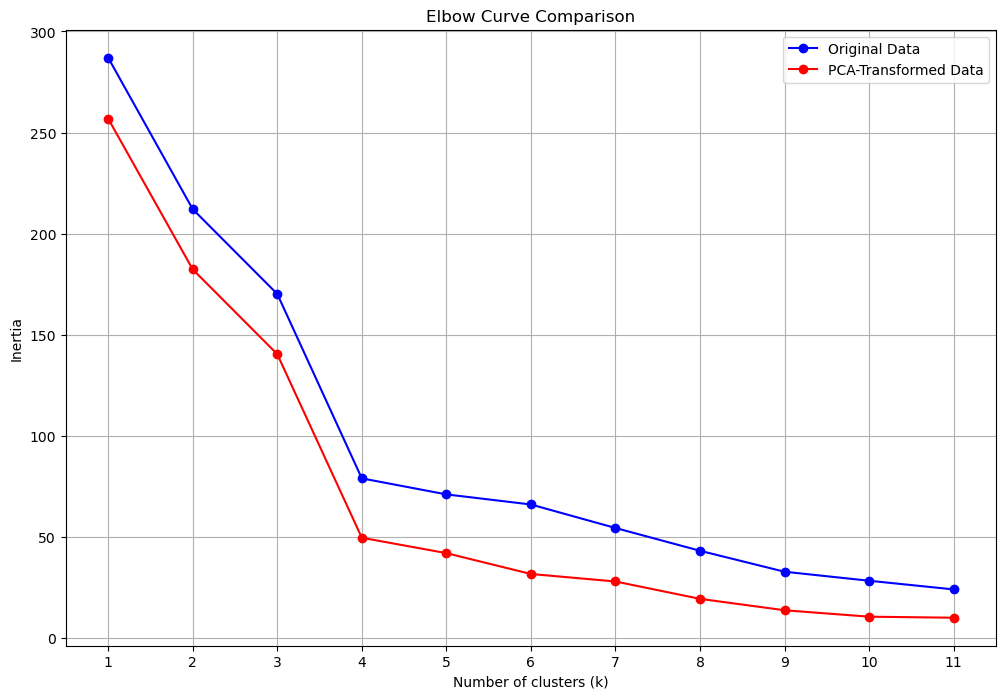

In [87]:
# Composite plot to contrast the Elbow curves
# Step 1: Create Elbow curve data for the original scaled data

# Create an empty list to store the inertia values for the original data
inertia_values_original = []

# Compute the inertia for each value of k
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values_original.append(kmeans.inertia_)

# Create a DataFrame with the Elbow curve data for the original data
elbow_data_original = {
    'k': range(1, 12),
    'inertia': inertia_values_original
}
df_elbow_original = pd.DataFrame(elbow_data_original)

# Step 2: Plot the Elbow curves for both the original and PCA-transformed data

plt.figure(figsize=(12, 8))

# Plot the Elbow curve for the original data
plt.plot(df_elbow_original['k'], df_elbow_original['inertia'], marker='o', linestyle='-', color='b', label='Original Data')

# Plot the Elbow curve for the PCA-transformed data
plt.plot(df_elbow['k'], df_elbow['inertia'], marker='o', linestyle='-', color='r', label='PCA-Transformed Data')

# Plot attributes
plt.title('Elbow Curve Comparison')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 12))
plt.grid(True)
plt.legend()

# Show the composite plot
plt.show()


In [85]:
# Composite plot to contrast the clusters
# YOUR CODE HERE!
import hvplot.pandas  # Import hvPlot for Pandas

# Ensure the Cluster column exists in both DataFrames
df_scaled_copy['Cluster'] = cluster_labels_best  # For the original data
df_pca_copy['Cluster'] = cluster_labels_best  # For the PCA-transformed data

# Ensure the crypto_name column exists in both DataFrames
df_scaled_copy['crypto_name'] = df_market_data.index
df_pca_copy['crypto_name'] = df_market_data.index

# Create scatter plot for the original scaled data
scatter_plot_original = df_scaled_copy.hvplot.scatter(
    x='price_change_percentage_24h', 
    y='price_change_percentage_7d', 
    by='Cluster',  # Color points by the 'Cluster' labels
    hover_cols=['crypto_name'],  # Add the cryptocurrency name to hover columns
    title='Cryptocurrency Clusters - Original Data',
    xlabel='24h Price Change (%)',
    ylabel='7d Price Change (%)',
    width=800,
    height=600
)

# Create scatter plot for the PCA-transformed data
scatter_plot_pca = df_pca_copy.hvplot.scatter(
    x='PC1', 
    y='PC2', 
    by='Cluster',  # Color points by the 'Cluster' labels
    hover_cols=['crypto_name'],  # Add the cryptocurrency name to hover columns
    title='Cryptocurrency Clusters - PCA Data',
    xlabel='Principal Component 1 (PC1)',
    ylabel='Principal Component 2 (PC2)',
    width=800,
    height=600
)

# Create composite plot by combining the two plots
composite_plot = scatter_plot_original + scatter_plot_pca

# Display the composite plot
composite_plot

:Layout
   .NdOverlay.I  :NdOverlay   [Cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,crypto_name)
   .NdOverlay.II :NdOverlay   [Cluster]
      :Scatter   [PC1]   (PC2,crypto_name)

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Using fewer features to cluster data with K-Means can really make a difference, and here are a few key points to consider:

* **Simplicity and Clarity:** When you have fewer features, the clusters you get are often simpler and easier to understand. This makes it a breeze to explain the results to others, especially those who aren't data experts. It’s like having a clear map versus one cluttered with too much information.

* **Efficiency:** Fewer features mean less computational load. This translates to faster processing times and lower memory usage, which is super handy when you’re dealing with large datasets or limited computational resources. Imagine trying to find a needle in a haystack – fewer features make that haystack much smaller.

* **Reduced Overfitting:** By narrowing down the features, you help the model focus on the most important ones. High-dimensional data can sometimes pick up on noise, leading to overfitting. Fewer features help the model generalize better, capturing the essence without getting lost in the details.

* **Potential Information Loss:** However, there’s a flip side. Reducing the number of features can mean losing some critical information. Important nuances or secondary patterns in the data might get overlooked, which could impact the quality of your clustering. It’s like cutting out parts of a story that might seem minor but add depth.

* **Focus on Principal Components:** When you use techniques like PCA, you’re zeroing in on the components that explain the most variance in your data. This highlights the most significant patterns but could miss out on less dominant, yet still relevant, features. Think of it as focusing on the main plot of a movie and potentially missing some interesting subplots.

In summary, while using fewer features can streamline your clustering process and make the results more interpretable and efficient, it’s essential to strike a balance to ensure you’re not missing out on critical information. It’s all about finding that sweet spot where simplicity meets comprehensiveness.